# Demo: Text-To-Image Synthesis (Flowers102)

In [1]:
import torch

import matplotlib.pyplot as plt

from utils.utils import pad_onehot_transpose

from datasets.utils import Tokenizer

from models.dcgan import Generator
from models.text_encoder import CNNRNNEncoder

In [2]:
from flowers.config import (
    WEIGHTS_TEXT_ENCODER,
    WEIGHTS_GENERATOR,
)

In [3]:
# Tokenizer
tokenizer = Tokenizer()
vocab_size = len(tokenizer)

cnn_dim = 512
emb_dim = 1024
average = True

# Text encoder
text_encoder = CNNRNNEncoder(vocab_size, cnn_dim, emb_dim, average)
text_encoder.load_state_dict(torch.load(WEIGHTS_TEXT_ENCODER, weights_only=True, map_location="cpu"))

<All keys matched successfully>

In [4]:
# Generator
nz = 100
nt = 128
ngf = 128

generator = Generator(nz, nt, emb_dim, ngf)
generator.load_state_dict(torch.load(WEIGHTS_GENERATOR, weights_only=True, map_location="cpu"))

<All keys matched successfully>

In [5]:
queries = [
    "this flower has orange petals that are dotted with black spots, surrounding orange and black stamens.",
    "this flower has blue petals."
    "the flower has petals that are feather like and white with green stigma.",
    "this flower is red.",
    "this flower is yellow.",
    "this flower is blue."
]

this flower has orange petals that are dotted with black spots, surrounding orange and black stamens.


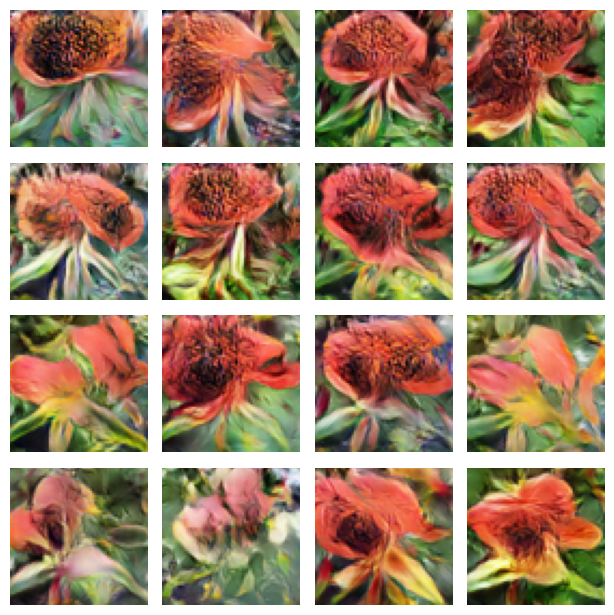

this flower has blue petals.the flower has petals that are feather like and white with green stigma.


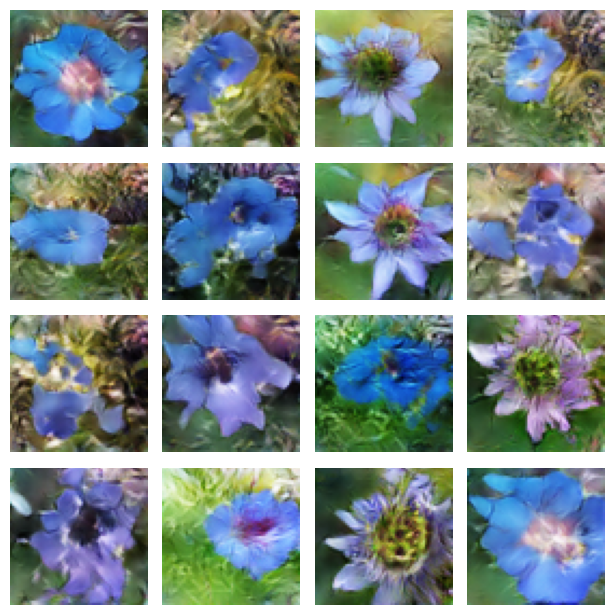

this flower is red.


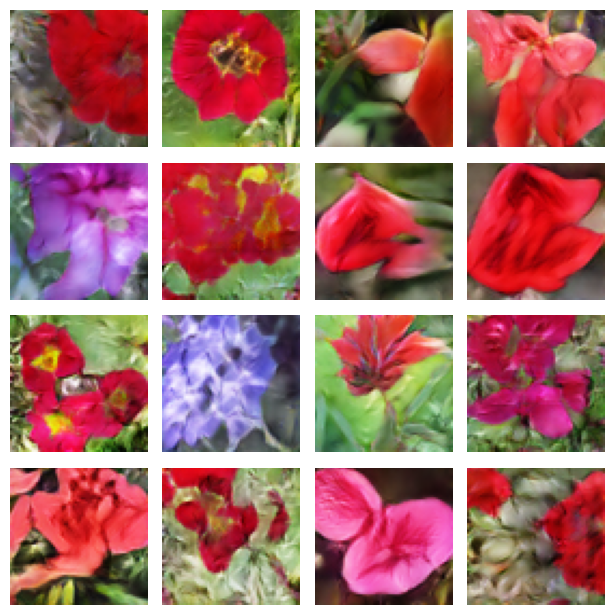

this flower is yellow.


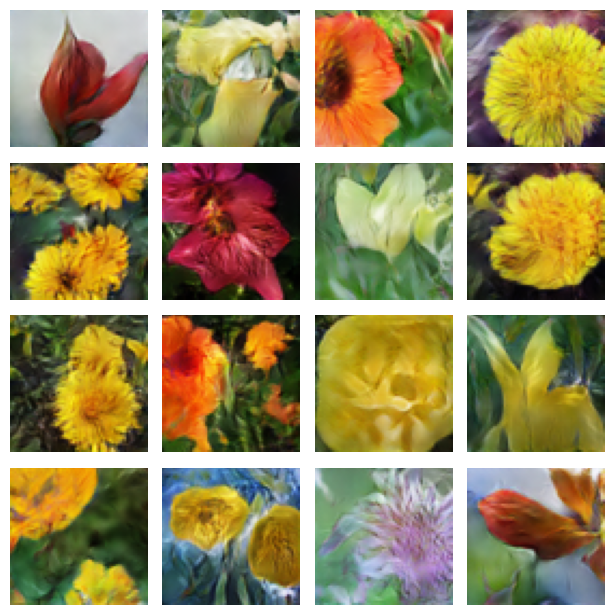

this flower is blue.


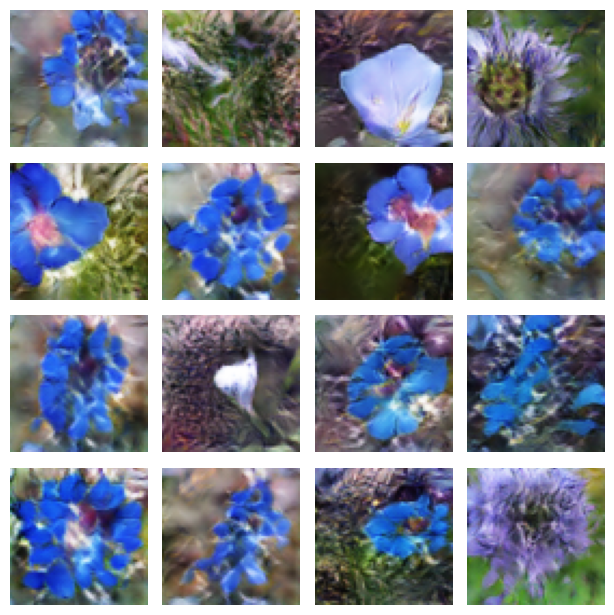

In [6]:
text_encoder.eval()
generator.eval()


N_ROWS = 4
N_COLS = 4
DPI = 100
H, W = 64, 64
FIGSIZE = (N_COLS * DPI / W, N_ROWS * DPI / H)


for query in queries:
    fig, ax = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=FIGSIZE)
    ax = ax.flatten()


    print(query)
    # Tokenization
    text_str = query    # string of length n
    text_tok = tokenizer(text_str)  # list of integers of length n
    text_tok = pad_onehot_transpose(text_tok, 0, 201, 70)   # tensor of shape [70, 201]
    text_tok = text_tok.unsqueeze(0) # tensor of shape [1, 70, 201]

    # Encode text 
    text_emb = text_encoder(text_tok)   # tensor of shape [1, 1024]

    for j in range(N_ROWS * N_COLS):

        noise = torch.randn((1, 100, 1, 1))

        fake_img = generator(noise, text_emb)
        fake_img = fake_img.squeeze(0)  # [3, 64, 64]

        fake_img = fake_img.detach().cpu().numpy()
        fake_img = fake_img.transpose(1, 2, 0)
        fake_img = ((fake_img+1)/2).clip(0, 1)

        ax[j].imshow(fake_img)
        ax[j].axis("off")
    plt.tight_layout() 
    plt.show()


